In [ ]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import sklearn

In [ ]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
today = dt.date.today()
n_years_back = today - dt.timedelta(days=365*10)
start_date = n_years_back.strftime('%Y-%m-%d')
end_date = today.strftime('%Y-%m-%d')
data = yf.download(tickers, start=start_date, end=end_date)
data

/tmp/ipython-input-2-1459250121.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  4 of 4 completed


Price            Close                                            High  \
Ticker            AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2015-07-17   29.030581   24.150499   34.772453   40.423759   29.030581   
2015-07-20   29.579302   24.405001   34.435474   40.683891   29.780871   
2015-07-21   29.283665   24.400000   34.560226   40.996044   29.769672   
2015-07-22   28.045130   24.413500   34.547806   39.487309   28.107840   
2015-07-23   28.031696   24.108999   33.535378   39.981548   28.463951   
...                ...         ...         ...         ...         ...   
2025-07-07  209.949997  223.470001  176.789993  497.720001  216.229996   
2025-07-08  210.009995  219.360001  174.360001  496.619995  211.429993   
2025-07-09  211.139999  222.539993  176.619995  503.510010  211.330002   
2025-07-10  212.410004  222.259995  177.619995  501.480011  213.479996   
2025-07-11  211.160004  225.020004  180.190002  503.320007  212.130005   

Price                                                  Low              \
Ticker            AMZN       GOOGL        MSFT        AAPL        AMZN   
Date                                                                     
2015-07-17   24.271000   34.940448   40.562494   28.737185   23.862499   
2015-07-20   24.660000   34.681997   40.865983   29.272465   24.270000   
2015-07-21   24.444000   35.069668   41.039401   29.187361   24.127501   
2015-07-22   24.625000   35.453871   40.692564   27.321716   24.245001   
2015-07-23   24.583000   34.596018   40.085598   28.009298   23.785000   
...                ...         ...         ...         ...         ...   
2025-07-07  224.289993  179.300003  498.750000  208.800003  222.369995   
2025-07-08  224.000000  177.949997  498.200012  208.449997  218.429993   
2025-07-09  224.289993  179.440002  506.779999  207.220001  220.470001   
2025-07-10  222.789993  178.429993  504.440002  210.029999  219.699997   
2025-07-11  226.679993  181.429993  505.029999  209.860001  222.369995   

Price                                     Open                          \
Ticker           GOOGL        MSFT        AAPL        AMZN       GOOGL   
Date                                                                     
2015-07-17   33.697900   40.111606   28.909640   23.885000   33.797303   
2015-07-20   33.885277   40.267688   29.332937   24.628500   34.243628   
2015-07-21   34.003564   40.302372   29.753996   24.395000   34.039845   
2015-07-22   34.374843   39.192498   27.321716   24.299500   34.494127   
2015-07-23   33.379312   39.105785   28.264620   24.583000   34.386273   
...                ...         ...         ...         ...         ...   
2025-07-07  175.679993  495.230011  212.679993  223.000000  179.059998   
2025-07-08  172.809998  494.109985  210.100006  223.919998  177.850006   
2025-07-09  172.770004  499.739990  209.529999  221.070007  175.250000   
2025-07-10  174.380005  497.750000  210.509995  221.550003  175.630005   
2025-07-11  176.479996  497.799988  210.570007  223.580002  176.789993   

Price                      Volume                                  
Ticker            MSFT       AAPL       AMZN      GOOGL      MSFT  
Date                                                               
2015-07-17   40.363063  184658800   98644000  257162000  29467100  
2015-07-20   40.449780  235600800   95050000  102436000  30631900  
2015-07-21   40.562499  307025600   63636000   75604000  42781900  
2015-07-22   39.400597  461802400   62298000   83100000  59152400  
2015-07-23   39.253192  203998000  187488000   76232000  33934000  
...                ...        ...        ...        ...       ...  
2025-07-07  497.380005   50229000   36604100   34175600  13981600  
2025-07-08  497.239990   42848900   45692000   40442500  11846600  
2025-07-09  500.299988   48749400   38155100   43025600  18659500  
2025-07-10  503.049988   44443600   30370600   29252400  16492100  
2025-

In [ ]:
missing = data.isna().sum(axis=0)
print(missing[missing>0])     #specify parts where the values are missing
#isna create df same as that of data and sum along the row(missing values)
#u can either fill forawrd or backward(data_bfill = data.bfill()) values or extrapolate(data_interp = data.interpolate(method='linear')

Series([], dtype: int64)


In [ ]:
data_stacked = data.stack(level=1).reset_index()
data_stacked.head()

/tmp/ipython-input-4-3869002692.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data_stacked = data.stack(level=1).reset_index()


Price,Date,Ticker,Close,High,Low,Open,Volume
0,2015-07-17,AAPL,29.030581,29.030581,28.737185,28.909640,184658800
1,2015-07-17,AMZN,24.150499,24.271000,23.862499,23.885000,98644000
2,2015-07-17,GOOGL,34.772453,34.940448,33.697900,33.797303,257162000
3,2015-07-17,MSFT,40.423759,40.562494,40.111606,40.363063,29467100
4,2015-07-20,AAPL,29.579302,29.780871,29.272465,29.332937,235600800


In [ ]:
print(data_stacked.columns)

Index(['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [ ]:
# Select the numerical columns
numerical_data = data_stacked[['Close', 'High', 'Low', 'Open', 'Volume']]
# number of unique dates and tickers
num_dates = data_stacked['Date'].nunique()
num_tickers = data_stacked['Ticker'].nunique()
# The original shape is (num_dates * num_tickers, 5)
# A(T*C)XN --> A(TXCXN)
tensor_data = numerical_data.values.reshape(num_dates, num_tickers, 5).transpose(2, 0, 1)
tensor_data = torch.tensor(tensor_data, dtype=torch.float32)
print(tensor_data.shape)

torch.Size([5, 2511, 4])


In [ ]:
tensor_data

tensor([[[2.9031e+01, 2.4150e+01, 3.4772e+01, 4.0424e+01],
         [2.9579e+01, 2.4405e+01, 3.4435e+01, 4.0684e+01],
         [2.9284e+01, 2.4400e+01, 3.4560e+01, 4.0996e+01],
         ...,
         [2.1114e+02, 2.2254e+02, 1.7662e+02, 5.0351e+02],
         [2.1241e+02, 2.2226e+02, 1.7762e+02, 5.0148e+02],
         [2.1116e+02, 2.2502e+02, 1.8019e+02, 5.0332e+02]],

        [[2.9031e+01, 2.4271e+01, 3.4940e+01, 4.0562e+01],
         [2.9781e+01, 2.4660e+01, 3.4682e+01, 4.0866e+01],
         [2.9770e+01, 2.4444e+01, 3.5070e+01, 4.1039e+01],
         ...,
         [2.1133e+02, 2.2429e+02, 1.7944e+02, 5.0678e+02],
         [2.1348e+02, 2.2279e+02, 1.7843e+02, 5.0444e+02],
         [2.1213e+02, 2.2668e+02, 1.8143e+02, 5.0503e+02]],

        [[2.8737e+01, 2.3862e+01, 3.3698e+01, 4.0112e+01],
         [2.9272e+01, 2.4270e+01, 3.3885e+01, 4.0268e+01],
         [2.9187e+01, 2.4128e+01, 3.4004e+01, 4.0302e+01],
         ...,
         [2.0722e+02, 2.2047e+02, 1.7277e+02, 4.9974e+02],
         [

In [ ]:
monthly_price = data['Close'].resample('M').last()
weekly_prices = data['Close'].resample('W').last()
yearly_prices = data['Close'].resample('Y').last()


/tmp/ipython-input-8-868709416.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_price = data['Close'].resample('M').last()
/tmp/ipython-input-8-868709416.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_prices = data['Close'].resample('Y').last()


In [ ]:
returns = data['Close'].pct_change()
log_returns = np.log(data['Close']/data['Close'].shift(1))
cum_returns = (1+returns).cumprod() - 1
monthly_returns = monthly_price.pct_change()
weekly_returns = weekly_prices.pct_change()
yearly_returns = yearly_prices.pct_change()
momentum = (data['Close'] - data['Close'].shift(10))
return_momentum = momentum.pct_change()
sma = data['Close'].rolling(window=10).mean()
ema = data['Close'].ewm(span=10, adjust=False).mean()
volatility = returns.rolling(window=10).std()
future_return = data['Close'].shift(-7)/data['Close'] - 1
# Merge the calculated features back into the original data DataFrame, maintaining the MultiIndex structure.
for ticker in tickers:
    data['returns', ticker] = returns[ticker]
    data['log_returns', ticker] = log_returns[ticker]
    data['cum_returns', ticker] = cum_returns[ticker]
    data['momentum', ticker] = momentum[ticker]
    data['return_momentum', ticker] = return_momentum[ticker]
    data['sma', ticker] = sma[ticker]
    data['ema', ticker] = ema[ticker]
    data['volatility', ticker] = volatility[ticker]
    data['future_return', ticker] = future_return[ticker]
data = data.dropna()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
from os import remove
X = data[['returns', 'volatility', 'return_momentum', 'sma', 'log_returns', 'cum_returns', 'ema']]
Y = data[['future_return']]
X.replace([np.inf, -np.inf], np.nan, inplace=True)
Y.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
Y.dropna(inplace=True)
tscv = TimeSeriesSplit(n_splits=5)
# XGboost cannot handle infinte values, so replace them with NaN and or or remove them

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
n_estimators_values = [50, 100, 150, 200] # Example values for n_estimators
max_depth_values = [3, 5, 7, 10] # Example values for max_depth

results = {}

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        print(f"Training with n_estimators={n_estimators}, max_depth={max_depth}")
        model = xgb.XGBRegressor(objective='reg:squarederror',
                                 n_estimators=n_estimators,
                                 learning_rate=0.05,
                                 max_depth=max_depth,
                                 missing=np.nan)

        mse_scores = []
        for train_idx, test_idx in tscv.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

            model.fit(X_train, Y_train)
            preds = model.predict(X_test)
            mse = mean_squared_error(Y_test, preds)
            mse_scores.append(mse)

        avg_mse = np.mean(mse_scores)
        results[(n_estimators, max_depth)] = avg_mse
        print(f"Average MSE: {avg_mse:.6f}")

# Find the best parameters
best_params = min(results, key=results.get)
print(f"\nBest parameters: n_estimators={best_params[0]}, max_depth={best_params[1]}")
print(f"Best average MSE: {results[best_params]:.6f}")

Training with n_estimators=50, max_depth=3
Average MSE: 0.002410
Training with n_estimators=50, max_depth=5
Average MSE: 0.002481
Training with n_estimators=50, max_depth=7
Average MSE: 0.002628
Training with n_estimators=50, max_depth=10
Average MSE: 0.002851
Training with n_estimators=100, max_depth=3
Average MSE: 0.002647
Training with n_estimators=100, max_depth=5
Average MSE: 0.002665
Training with n_estimators=100, max_depth=7
Average MSE: 0.002798
Training with n_estimators=100, max_depth=10
Average MSE: 0.002992
Training with n_estimators=150, max_depth=3
Average MSE: 0.002815
Training with n_estimators=150, max_depth=5
Average MSE: 0.002766
Training with n_estimators=150, max_depth=7
Average MSE: 0.002867
Training with n_estimators=150, max_depth=10
Average MSE: 0.003029
Training with n_estimators=200, max_depth=3
Average MSE: 0.002929
Training with n_estimators=200, max_depth=5
Average MSE: 0.002834
Training with n_estimators=200, max_depth=7
Average MSE: 0.002911
Training wi

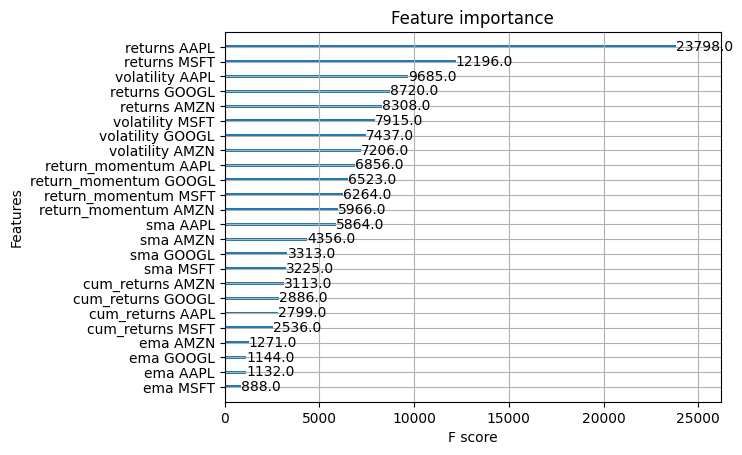

In [ ]:
xgb.plot_importance(model)
plt.show()
# A higher F score means how frequent the features appears to split